In [ ]:
from useful_scit.imps import * 
from checkSST_funs import *

In [3]:
pathTest = '/proj/atm/saltena/runs/run_2019_04_03_1/wrf2'
pathCont = '/proj/atm/saltena/runs/run_2019_02_28_2/wrf' # as in control 
paths = (pathTest,pathCont)

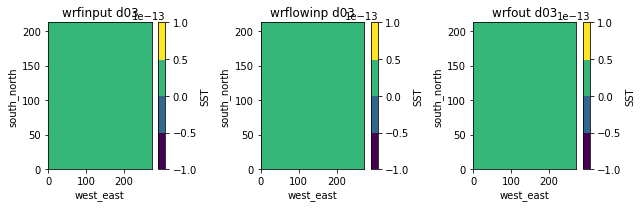

In [16]:
inps = ['wrfinput','wrflowinp','wrfout']
pr,pc = 1,len(inps)
siz = 3
fig = plt.figure(figsize=(pc*siz,pr*siz))
for ii,i in enumerate(inps):
    dom='d03'
    dss = [get_d0(p,i,dom) for p in paths]
    ax = fig.add_subplot(pr,pc,ii+1)
    nds = (dss[0].SST - dss[1].SST)
    
    nds[0].plot(ax=ax,levels = 5)
    ax.set_title('{} {}'.format(i,dom))
fig.tight_layout()

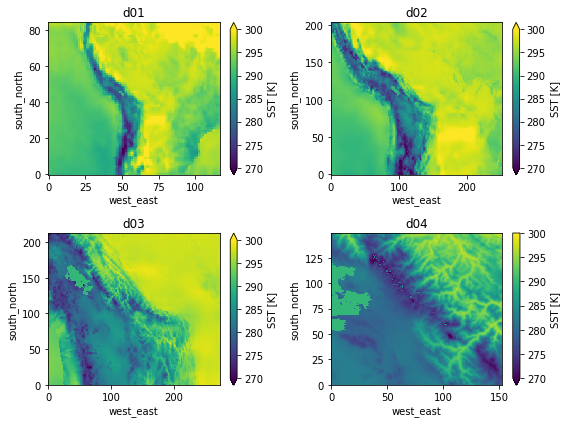

In [19]:
dfC = get_file_list(pathCont)

doms = ['d01','d02','d03','d04']
ld = len(doms)
r = 2
c = 2 
fig, axsG = plt.subplots(r,c,figsize=(4*r,3*c))
axsL = np.ndarray.flatten(axsG)
for i in range(ld):
    d = doms[i]
    ax = axsL[i]
    path = get_specific_files([['kind','wrfinput'],['dom',d]],dfC).iloc[0].path

    ds = xr.open_dataset(path)

    ds.SST.plot(ax=ax, vmin = 270, vmax= 300)
    ax.set_title(d) 
fig.tight_layout()

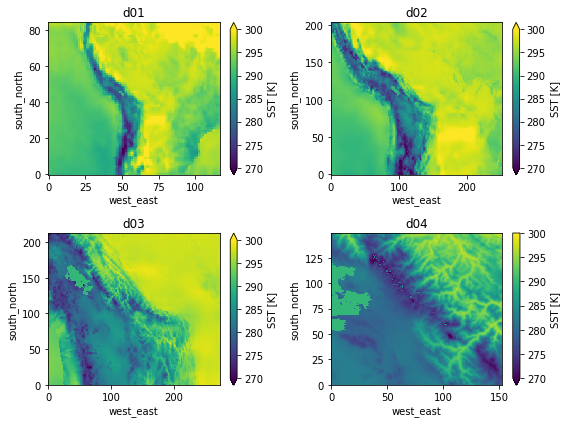

In [20]:
dfT = get_file_list(pathTest)
doms = ['d01','d02','d03','d04']
ld = len(doms)
r = 2
c = 2 
fig, axsG = plt.subplots(r,c,figsize=(4*r,3*c))
axsL = np.ndarray.flatten(axsG)
for i in range(ld):
    d = doms[i]
    ax = axsL[i]
    path = get_specific_files([['kind','wrfout'],['dom',d]],dfT).iloc[0].path

    ds = xr.open_dataset(path)

    ds.SST[0].plot(ax=ax, vmin = 270, vmax= 300)
    ax.set_title(d) 
fig.tight_layout()

In [21]:
ds['lat']=ds.XLAT
ds['lon']=ds.XLONG

ds1 =  ds[['lat','lon']].copy()

In [22]:
ttccP = mpl.path.Path(ttcc)
def fun(la,lo):
    global xx
    xx=(la,lo)
    res = ttccP.contains_points([[lo,la]])
    return res
ds['is_ttcc']=xr.apply_ufunc(fun,ds1['lat'],ds1['lon'],vectorize=True)
ds['is_ttcc']= ds['is_ttcc'] & (ds.LAKEMASK==1)

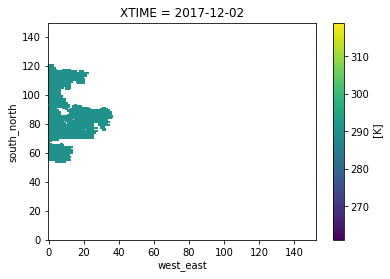

In [23]:
ds.SST.where(ds.is_ttcc)[0].plot()

In [102]:
outFs = get_specific_files([['kind','wrfout'],['dom','d02']],dfT)

In [110]:
outF1 = outFs[::12].copy()
outF1['sst'] = outF1.apply(lambda r: get_sst_ttcc(r),axis=1)

In [111]:
merge = xr.merge(outF1.sst.values)

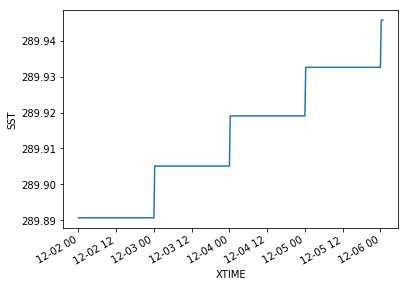

In [112]:
l2ds = merge.SST.median(dim=['south_north','west_east']).plot()
l2d = l2ds[0]


In [ ]:
l2d.axes.set_title('asdf')
l2d.axes.grid(True)
l2d.axes.figure